In [84]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model

In [85]:
df = pd.read_csv("sample_submission.csv")
images_path = df["id"]
images_path = images_path.to_numpy()
images_path

array(['000621fb3cbb32d8935728e48679680e',
       '00102ee9d8eb90812350685311fe5890',
       '0012a730dfa437f5f3613fb75efcd4ce', ...,
       'fff74b59b758bbbf13a5793182a9bbe4',
       'fff7d50d848e8014ac1e9172dc6762a3',
       'fffbff22c1f51e3dc80c4bf04089545b'], dtype=object)

In [86]:
dir_path = "test"
target_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

test_data = datagen.flow_from_directory(
    dir_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

Found 10357 images belonging to 1 classes.


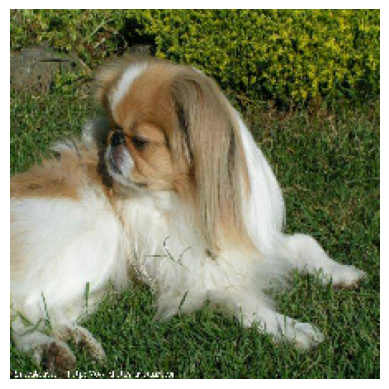

In [87]:
next(test_data)
plt.imshow(test_data[0][0])
plt.axis("off")
plt.show()

In [88]:
model = load_model("first_model.keras")
predictions = model.predict(test_data, verbose=0)

d:\Software\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [89]:
id_column = df["id"]
columns = df.columns[1::]

In [90]:
df_predictions = pd.DataFrame(predictions, columns=columns)
df_predictions.insert(0, 'id', id_column)
df_predictions.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,4.469431e-08,1.709697e-04,1.573758e-12,2.865759e-09,4.086941e-08,1.558326e-09,1.035033e-09,4.663090e-12,7.747872e-09,1.518172e-08,6.196136e-10,7.342375e-05,1.047131e-17,1.559177e-03,2.320281e-11,1.114215e-17,4.337970e-06,8.193706e-09,2.386748e-05,6.265248e-08,3.787640e-12,2.204517e-08,4.522579e-07,2.099885e-06,6.069851e-10,1.684813e-07,5.307774e-11,1.002457e-07,1.817459e-11,9.011015e-05,7.937275e-07,0.000006,2.873676e-07,0.001024,1.767526e-14,1.094021e-06,2.264708e-12,3.757928e-12,1.927603e-11,...,1.015971e-12,7.749973e-08,2.466149e-04,1.156504e-10,7.660250e-04,2.057958e-01,8.286182e-09,6.005702e-06,2.647137e-05,2.269710e-07,8.196496e-15,1.144233e-12,3.036397e-04,5.982973e-08,7.900744e-09,1.024144e-11,1.174464e-13,7.876011e-12,7.519792e-05,2.309237e-06,1.844981e-02,1.320973e-07,5.830104e-06,1.886119e-09,3.192148e-08,5.099092e-12,2.408581e-08,2.763627e-09,1.989324e-06,2.698175e-04,1.009507e-04,2.367610e-07,3.453445e-12,8.189968e-10,6.660617e-11,1.005654e-07,1.723149e-08,5.216574e-14,5.789883e-06,1.037845e-05
1,00102ee9d8eb90812350685311fe5890,3.618550e-09,2.564565e-10,3.202462e-08,2.185366e-10,2.798814e-09,1.953597e-12,1.733326e-07,4.170264e-11,6.189969e-11,1.167681e-09,1.040542e-08,1.688722e-05,2.554554e-16,3.366905e-07,6.891853e-12,5.833312e-11,1.630367e-04,1.181417e-07,2.676031e-05,3.210688e-08,5.778791e-12,8.505588e-14,1.380451e-10,3.712592e-11,1.209356e-06,1.467884e-12,1.074432e-05,4.744763e-08,2.970475e-09,2.797131e-04,7.516742e-05,0.000096,1.442298e-08,0.000013,1.601109e-10,7.681085e-09,6.485656e-08,7.002806e-07,1.930585e-13,...,3.866573e-06,4.946878e-05,3.273927e-05,9.312506e-11,5.065441e-07,8.072345e-06,4.751606e-06,4.378866e-03,4.077610e-10,5.648342e-11,4.927098e-11,9.471176e-08,1.547570e-08,3.717643e-08,9.459512e-01,5.769918e-07,1.974924e-06,1.958399e-08,1.096786e-06,3.039374e-07,3.383024e-07,2.753990e-03,2.197101e-11,4.917843e-10,6.751016e-08,4.292627e-06,2.647907e-10,1.616826e-12,4.672942e-07,3.944544e-09,3.003776e-10,6.173793e-07,6.070591e-15,1.646889e-13,4.049323e-09,1.290130e-10,6.593124e-05,5.375627e-09,1.210665e-08,3.674097e-09
2,0012a730dfa437f5f3613fb75efcd4ce,2.776224e-05,8.966430e-03,1.445475e-04,1.219888e-06,1.997600e-08,8.634165e-10,6.611171e-07,2.775438e-14,1.191465e-07,7.481424e-12,1.321552e-05,1.673732e-07,5.148232e-12,6.018940e-08,1.827870e-10,2.233436e-06,6.735746e-06,1.453971e-05,9.249035e-03,2.865281e-08,5.237446e-06,8.026645e-11,8.385208e-12,6.295752e-02,5.225166e-05,8.119103e-09,4.915258e-03,6.058527e-12,1.521999e-04,1.786323e-08,5.152659e-10,0.409289,4.690737e-04,0.000032,6.354019e-08,4.190283e-05,2.334501e-08,1.832520e-09,3.465342e-13,...,9.731542e-08,3.071282e-06,2.430389e-04,1.497544e-03,1.372824e-09,1.781998e-07,2.226709e-11,1.011756e-07,5.785819e-08,3.456829e-15,6.709526e-13,6.394540e-12,1.825622e-06,1.737736e-07,4.482686e-07,4.037449e-09,4.094550e-05,2.331646e-02,9.0

In [91]:
columns[np.argmax(np.array(df_predictions.iloc[0])[1::])]

'japanese_spaniel'

In [92]:
df_predictions.to_csv("sample_result.csv", index=False)